In [1]:
using Pkg; Pkg.activate("fiskom")

  Activating project at `/mnt/scratch/irnaka/Fisika Komputasi/fiskom`


In [6]:
using LinearAlgebra, SparseArrays

# Define GLL points and weights for each element (2nd-order polynomial)
# x_gll = [-1.0, 0.0, 1.0]  # Local GLL points within each element
# w_gll = [1/3, 4/3, 1/3]   # Local GLL weights
# Define GLL points and weights for each element (4nd-order polynomial)
x_gll = [-1.0, -sqrt(3/7), 0, sqrt(3/7), 1.0]  # Local GLL points within each element
w_gll = [1/10, 49/90, 32/45, 49/90, 1/10]   # Local GLL weights

# Number of elements and polynomial order
num_elements = 3
N = length(x_gll) - 1

# Function to create local Lagrange polynomial
function lagrange_polynomial(i, x_gll, x)
    p = 1
    for j in 1:length(x_gll)
        if i != j
            p *= (x - x_gll[j]) / (x_gll[i] - x_gll[j])
        end
    end
    return p
end

# Function to create local mass matrix for an element
function create_local_mass_matrix(N, x_gll, w_gll)
    local_mass_matrix = zeros(N+1, N+1)
    for i in 1:N+1
        local_mass_matrix[i, i] = sum(w_gll[k] * lagrange_polynomial(i, x_gll, x_gll[k])^2 for k in 1:N+1)
    end
    return local_mass_matrix
end

# Assemble global mass matrix
global_mass_matrix = spzeros(N * num_elements + 1, N * num_elements + 1)

for e in 1:num_elements
    local_mass = create_local_mass_matrix(N, x_gll, w_gll)
    
    # Determine the global indices for the local element
    global_indices = (N*(e-1)+1):(N*e+1)

    # Place the local mass matrix in the global matrix
    global_mass_matrix[global_indices, global_indices] += local_mass
end

println("Global Diagonalized Mass Matrix: ")
println(global_mass_matrix)


Global Diagonalized Mass Matrix: 
sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [0.1, 0.5444444444444444, 0.7111111111111111, 0.5444444444444444, 0.2, 0.5444444444444444, 0.7111111111111111, 0.5444444444444444, 0.2, 0.5444444444444444, 0.7111111111111111, 0.5444444444444444, 0.1], 13, 13)


In [7]:
global_mass_matrix

13×13 SparseMatrixCSC{Float64, Int64} with 13 stored entries:
 0.1   ⋅         ⋅         ⋅         ⋅   …   ⋅         ⋅         ⋅         ⋅ 
  ⋅   0.544444   ⋅         ⋅         ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅        0.711111   ⋅         ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅        0.544444   ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅        0.2      ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅   …   ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅       ⋅         ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅      0.544444   ⋅         ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅   …   ⋅        0.711111   ⋅         ⋅ 
  ⋅    ⋅         ⋅         ⋅         ⋅       ⋅         ⋅        0.544444   ⋅ 
  

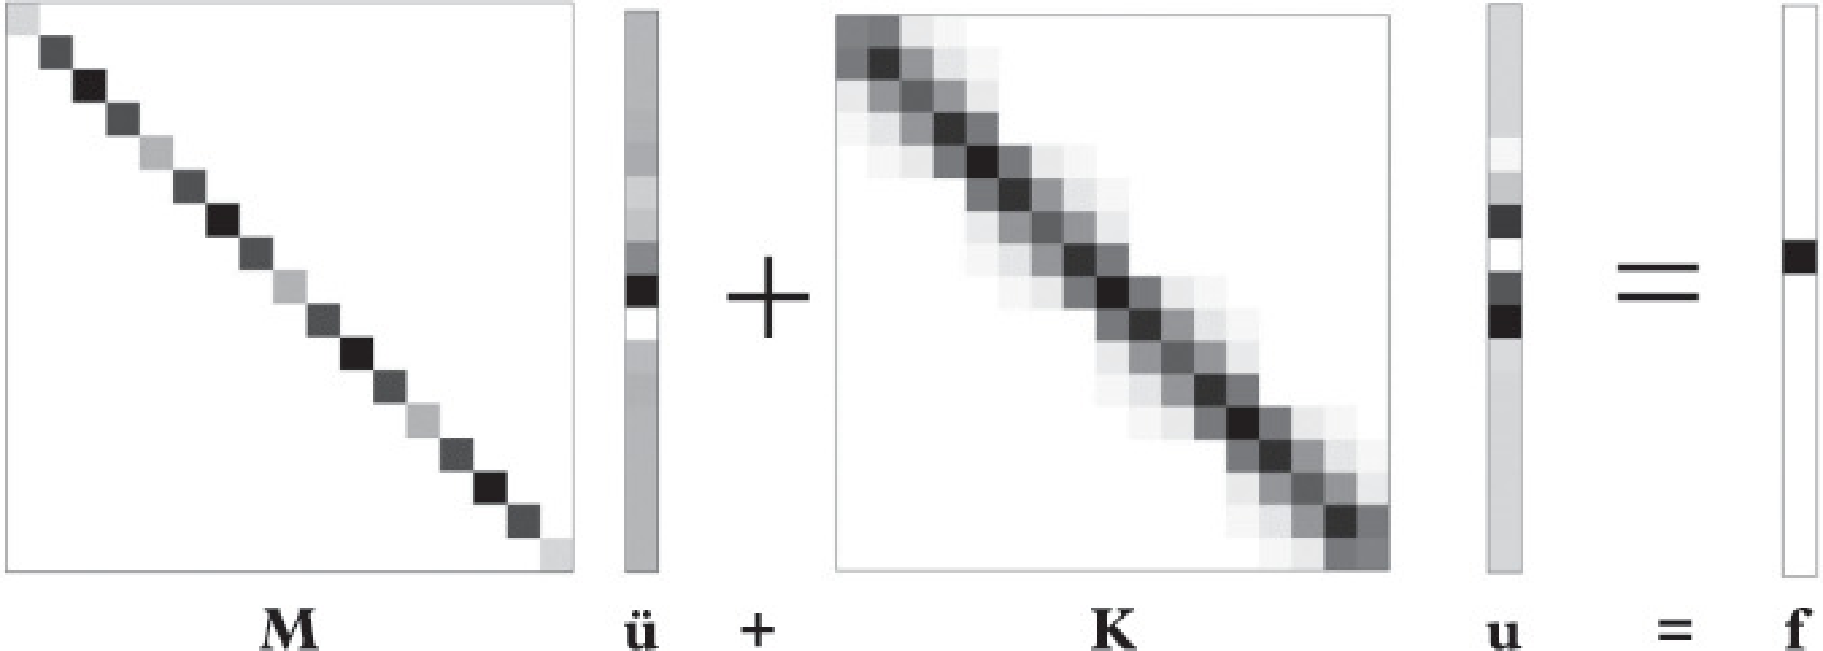

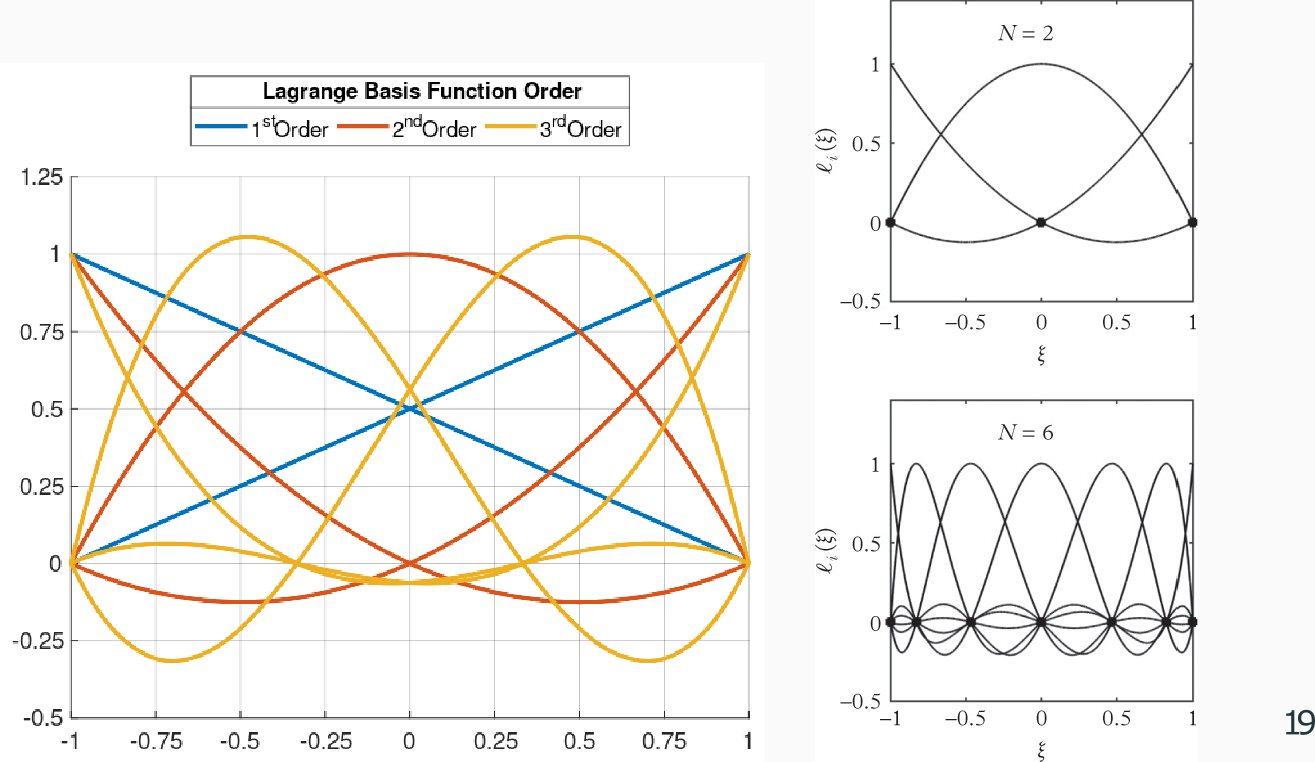

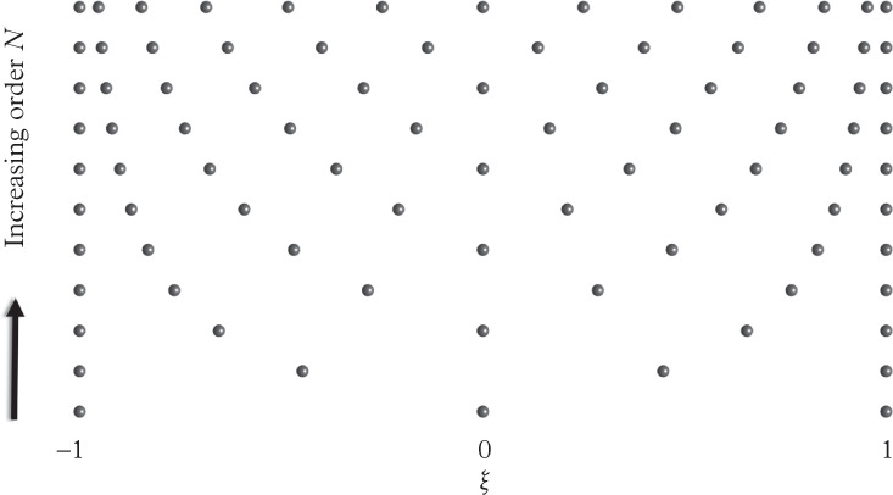

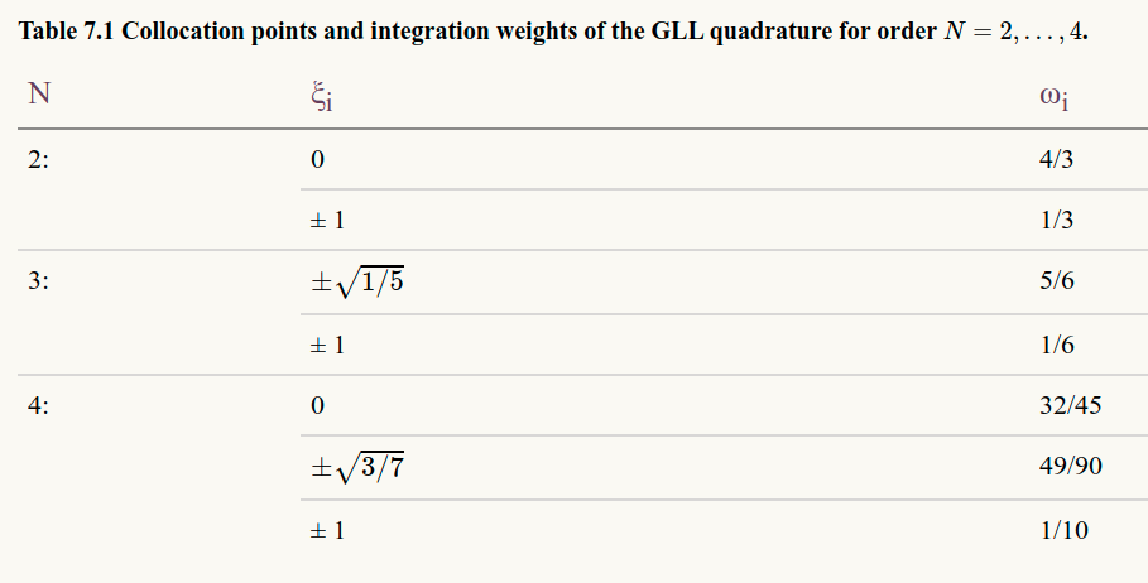

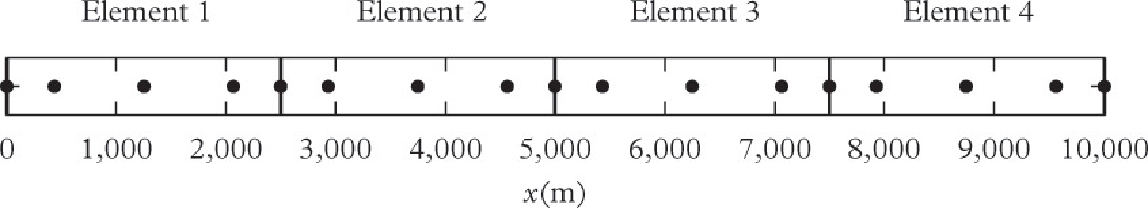

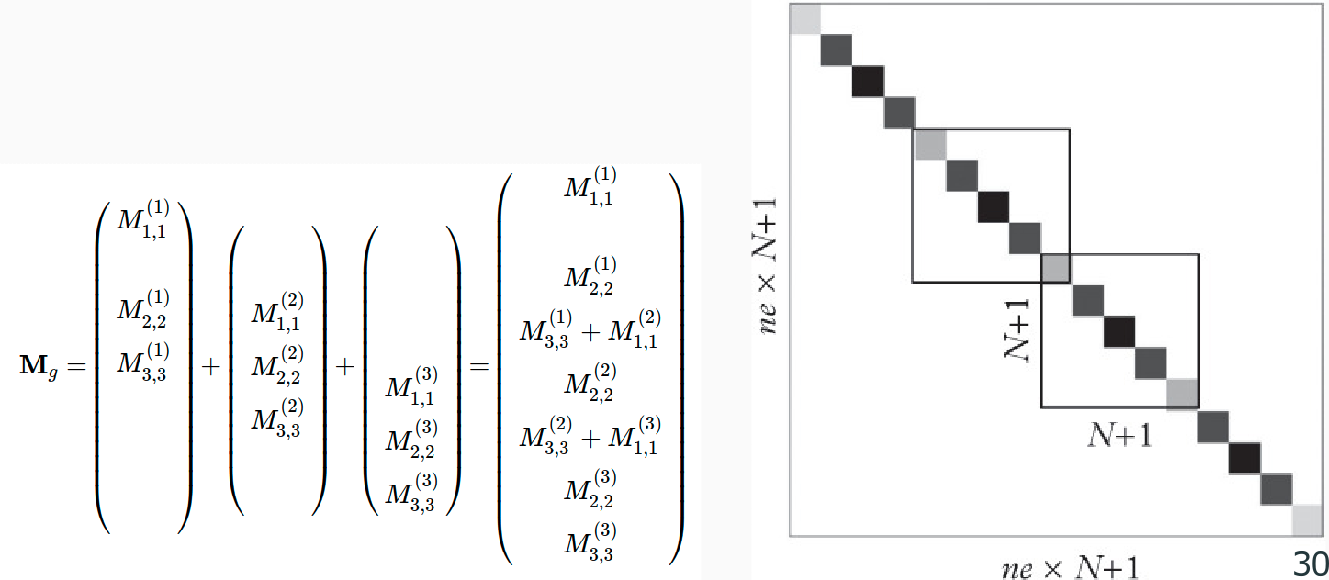

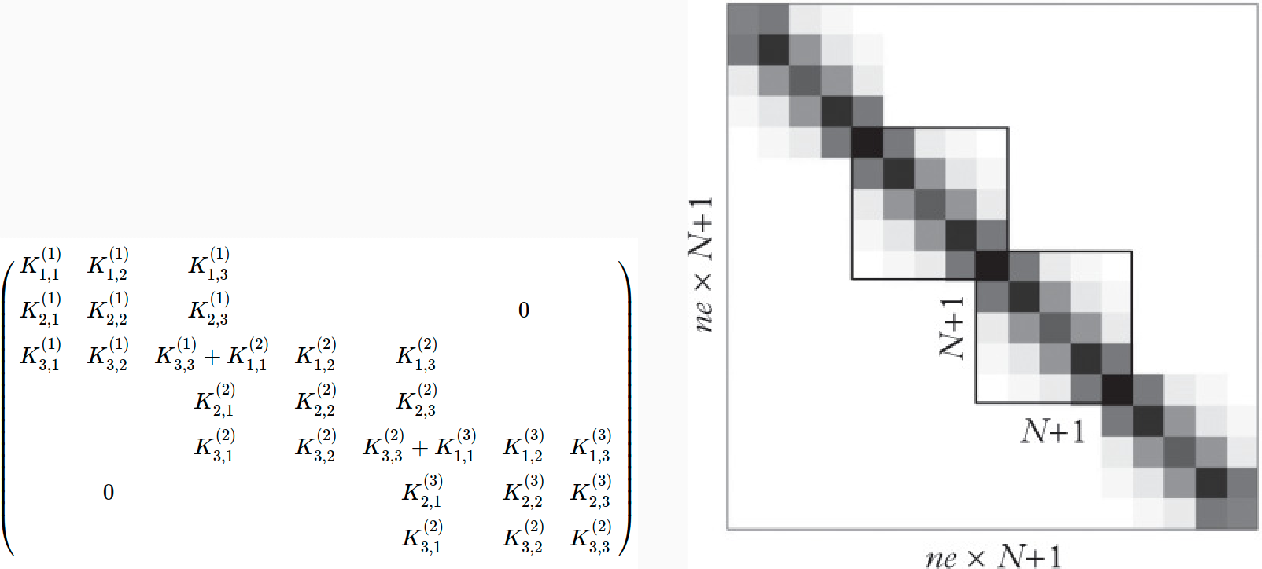

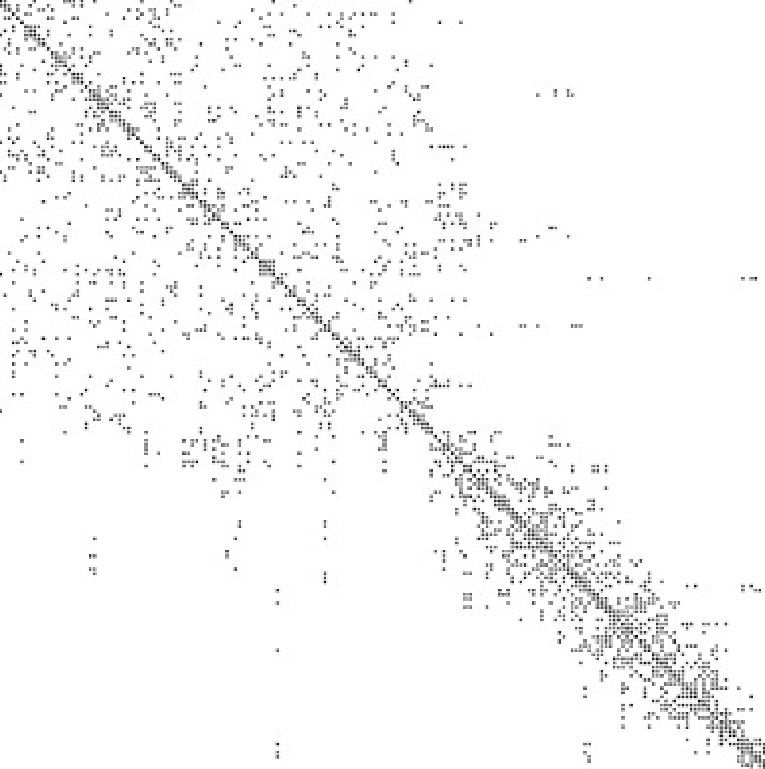

In [1]:
# Define the number of elements in each dimension
num_elements_x = 3
num_elements_y = 2

# Polynomial order (N) and number of GLL points (N+1)
N = 2  # Example for quadratic polynomials
num_gll_points = N + 1

# Placeholder for local GLL points and weights (use actual values in practice)
local_gll_points = [-1.0, 0.0, 1.0]  # for N = 2
local_gll_weights = [1/3, 4/3, 1/3]  # for N = 2

# Function to create a 2D local mass matrix for an element
function create_local_mass_matrix_2d(N, local_gll_weights)
    local_mass_matrix = zeros((N+1)^2, (N+1)^2)
    for i in 1:(N+1)
        for j in 1:(N+1)
            index = (i - 1) * (N + 1) + j
            local_mass_matrix[index, index] = local_gll_weights[i] * local_gll_weights[j]
        end
    end
    return local_mass_matrix
end

# Initialize the global mass matrix
global_matrix_size = num_elements_x * num_elements_y * num_gll_points^2
global_mass_matrix = spzeros(global_matrix_size, global_matrix_size)

# Assemble the global mass matrix
for ex in 1:num_elements_x
    for ey in 1:num_elements_y
        local_mass = create_local_mass_matrix_2d(N, local_gll_weights)
        
        # Calculate global index offset
        offset = ((ex - 1) * num_gll_points + (ey - 1) * num_elements_x * num_gll_points^2)

        for i in 1:size(local_mass, 1)
            for j in 1:size(local_mass, 2)
                global_i = offset + i
                global_j = offset + j
                global_mass_matrix[global_i, global_j] += local_mass[i, j]
            end
        end
    end
end

println("Global 2D Mass Matrix: ")
println(global_mass_matrix)


LoadError: UndefVarError: `spzeros` not defined

In [18]:
global_mass_matrix

54×54 SparseMatrixCSC{Float64, Int64} with 30 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎦